In [ ]:
# run this cell to install Julia
# F5 to refresh

%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.6.0" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools PyCall PyPlot"
JULIA_PACKAGES_IF_GPU="CUDA"
JULIA_NUM_THREADS=4
#---------------------------------------------------#

if [ -n "$COLAB_GPU" ] && [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  if [ "$COLAB_GPU" = "1" ]; then
      JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
fi

Installing Julia 1.6.0 on the current Colab Runtime...
2021-09-30 02:53:59 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.6/julia-1.6.0-linux-x86_64.tar.gz [112838927/112838927] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing Julia package PyCall...
Installing Julia package PyPlot...
Installing Julia package CUDA...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.6

Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then


In [5]:
# Intializing plotting packages
using Pkg
Pkg.add("Plots")

using Plots
plotly();
gr();

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`


In [6]:
function bern(k,n,t)
  return binomial(n,k)*t^k*(1-t)^(n-k)
end

bern (generic function with 1 method)

In [7]:
function bez(p)
  x=p[1:2:7]
  y=p[2:2:8]
  
  t=0:.02:1
  b0=bern.(0,3,t)
  b1=bern.(1,3,t)
  b2=bern.(2,3,t)
  b3=bern.(3,3,t)

  xt = x[1]*b0 + x[2]*b1 + x[3]*b2 + x[4]*b3
  yt = y[1]*b0 + y[2]*b1 + y[3]*b2 + y[4]*b3

  plot!(xt, yt, legend=false, color="black")
end

bez (generic function with 1 method)

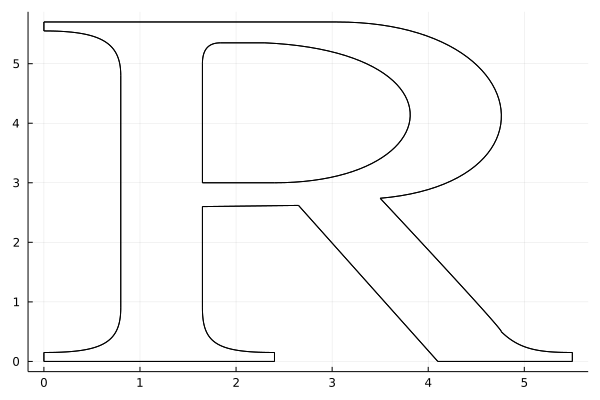

In [8]:
X = [
0.00 5.70 0.00 5.70 0.00 5.55 0.00 5.55 ;
0.00 5.55 0.60 5.55 0.80 5.35 0.80 4.80 ;
0.80 4.80 0.80 4.80 0.80 0.90 0.80 0.90 ;
0.80 0.90 0.80 0.30 0.60 0.15 0.00 0.15 ;
0.00 0.15 0.00 0.15 0.00 0.00 0.00 0.00 ;
0.00 0.00 0.00 0.00 2.40 0.00 2.40 0.00 ;
2.40 0.00 2.40 0.00 2.40 0.15 2.40 0.15 ;
2.40 0.15 1.80 0.15 1.65 0.30 1.65 0.90 ;
1.65 0.90 1.65 0.90 1.65 2.60 1.65 2.60 ;
1.65 2.60 1.65 2.60 2.65 2.62 2.65 2.62 ;
2.65 2.62 2.65 2.62 4.10 0.00 4.10 0.00 ;
4.10 0.00 4.10 0.00 5.50 0.00 5.50 0.00 ;
5.50 0.00 5.50 0.00 5.50 0.15 5.50 0.15 ;
5.50 0.15 5.15 0.15 4.95 0.20 4.76 0.50 ;
4.76 0.50 4.80 0.50 3.50 2.74 3.50 2.74 ;
3.50 2.74 5.38 3.00 5.10 5.70 3.05 5.70 ;
3.05 5.70 3.05 5.70 0.00 5.70 0.00 5.70 ;
1.65 3.00 1.65 3.00 1.65 5.00 1.65 5.00 ;
1.65 5.00 1.65 5.30 1.75 5.35 1.84 5.35 ;
1.84 5.35 1.84 5.35 2.30 5.35 2.30 5.35 ;
2.30 5.35 4.40 5.20 4.20 3.00 2.40 3.00 ;
2.40 3.00 2.40 3.00 1.65 3.00 1.65 3.00
]

for i=1:length(X[:,1])
    bez(X[i,:])
end
plot!()